# Graph Combinatorial Game

A two-player turn-based game played on graphs. Players take turns removing nodes **along with all adjacent neighbors**. The player who removes the last node(s) wins.

This is known as **Node Kayles** - a classic combinatorial game theory problem.

In [41]:
## 1. Imports


In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import itertools


In [43]:
## 2. Helper Functions


In [44]:
def draw_graph(G, title="Current Graph State"):
    """Visualize the graph with labeled nodes."""
    plt.figure(figsize=(6, 4))
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
    plt.title(title)
    plt.show()

def generate_random_graph(min_nodes=5, max_nodes=25, max_degree=3):
    """Generate a random graph with degree constraints."""
    num_nodes = random.randint(min_nodes, max_nodes)
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    
    possible_edges = list(itertools.combinations(range(num_nodes), 2))
    random.shuffle(possible_edges)
    
    degrees = {i: 0 for i in range(num_nodes)}
    
    for u, v in possible_edges:
        if degrees[u] < max_degree and degrees[v] < max_degree:
            G.add_edge(u, v)
            degrees[u] += 1
            degrees[v] += 1
        if all(d >= max_degree for d in degrees.values()):
            break
    
    return G

def remove_node(G, node):
    """Remove a single node from the graph."""
    if node in G.nodes:
        G.remove_node(node)
        print(f"Removed node: {node}")
        return True
    else:
        print("Invalid move. Node does not exist.")
        return False

def remove_node_and_neighbors(G, node):
    """Remove a node and all its adjacent neighbors from the graph."""
    if node not in G.nodes:
        print(f"Node '{node}' not found in the graph.")
        return False
    
    neighbors = list(G.neighbors(node))
    G.remove_node(node)
    print(f"Removed node: {node}")
    
    for neighbor in neighbors:
        if neighbor in G.nodes:
            G.remove_node(neighbor)
            print(f"  → Also removed neighbor: {neighbor}")
    
    return True


## 3. Play the Game

Remove a node and all its adjacent neighbors. The player who removes the last node(s) wins!

Initial Graph:


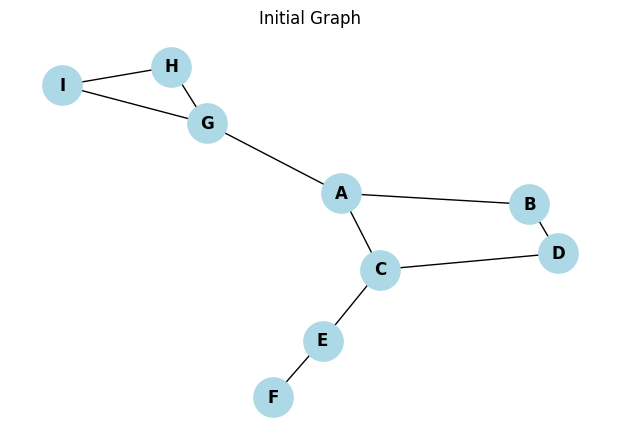


Player 1's turn.
Available nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
Removed node: A
  → Also removed neighbor: B
  → Also removed neighbor: C
  → Also removed neighbor: G


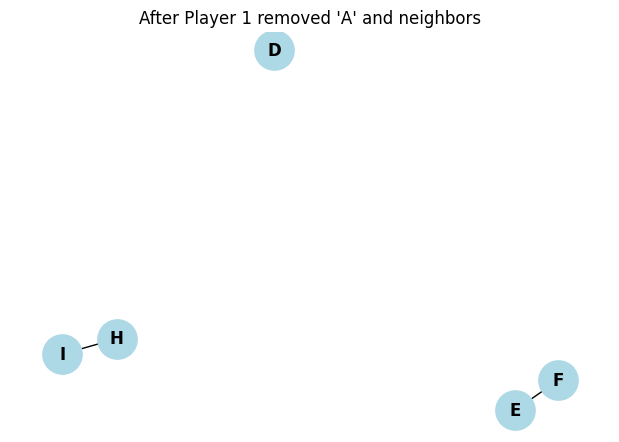


Player 2's turn.
Available nodes: ['D', 'E', 'F', 'H', 'I']
Removed node: D


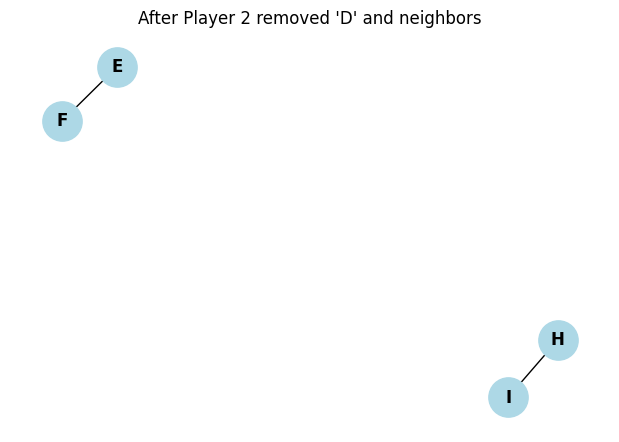


Player 1's turn.
Available nodes: ['E', 'F', 'H', 'I']
Removed node: H
  → Also removed neighbor: I


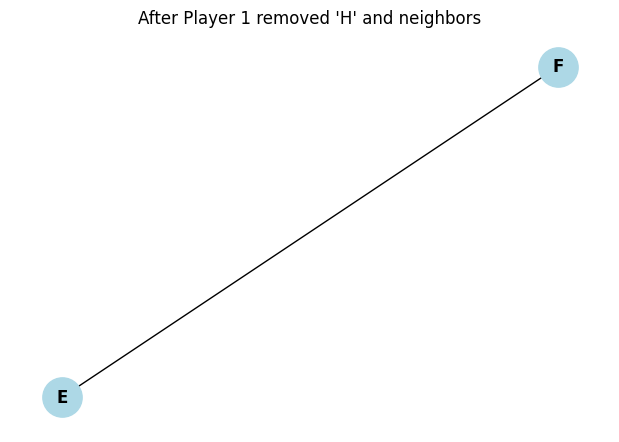


Player 2's turn.
Available nodes: ['E', 'F']
Removed node: E
  → Also removed neighbor: F

🎉 Player 2 removed the last node(s) and WINS!


In [45]:
# Create the game graph
G_game = nx.Graph()
G_game.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('B', 'D'),
    ('C', 'D'), ('C', 'E'), ('E', 'F'),
    ('G', 'H'), ('H', 'I'), ('I', 'G'),
    ('A', 'G')
])

# Game Loop
players = ["Player 1", "Player 2"]
turn = 0

print("Initial Graph:")
draw_graph(G_game, "Initial Graph")

while len(G_game.nodes) > 0:
    current_player = players[turn % 2]
    print(f"\n{current_player}'s turn.")
    print("Available nodes:", list(G_game.nodes))
    
    node = input("Enter a node to remove: ").strip()
    if node not in G_game.nodes:
        print("Invalid node. Try again.")
        continue
    
    remove_node_and_neighbors(G_game, node)
    
    if len(G_game.nodes) == 0:
        print(f"\n🎉 {current_player} removed the last node(s) and WINS!")
        break
    
    draw_graph(G_game, f"After {current_player} removed '{node}' and neighbors")
    turn += 1

In [46]:
## 4. Play with Random Graph

Random Graph with 12 nodes and 17 edges



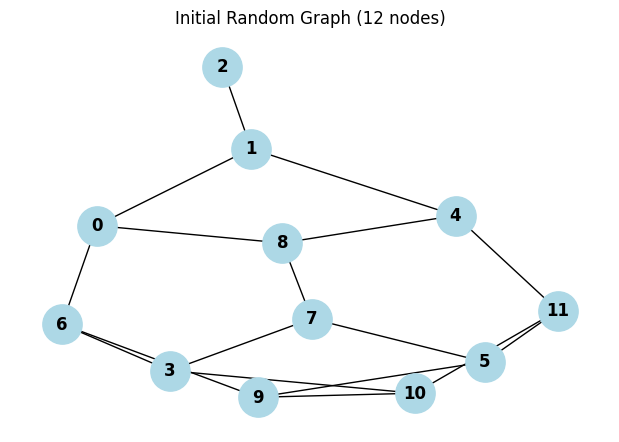


Player 1's turn.
Available nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Invalid node. Try again.

Player 1's turn.
Available nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Invalid node. Try again.

Player 1's turn.
Available nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Removed node: 1
  → Also removed neighbor: 4
  → Also removed neighbor: 2
  → Also removed neighbor: 0


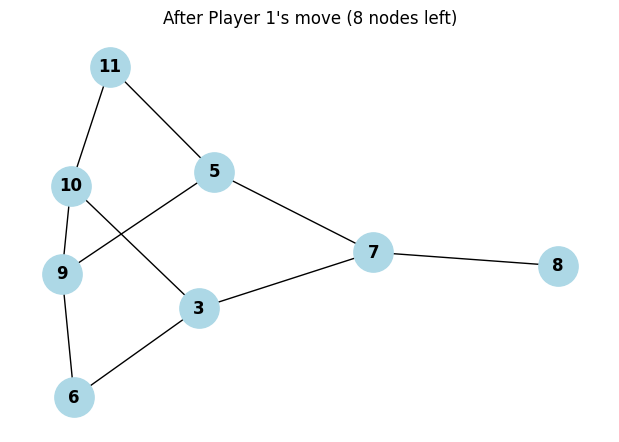


Player 2's turn.
Available nodes: [3, 5, 6, 7, 8, 9, 10, 11]
Removed node: 3
  → Also removed neighbor: 7
  → Also removed neighbor: 6
  → Also removed neighbor: 10


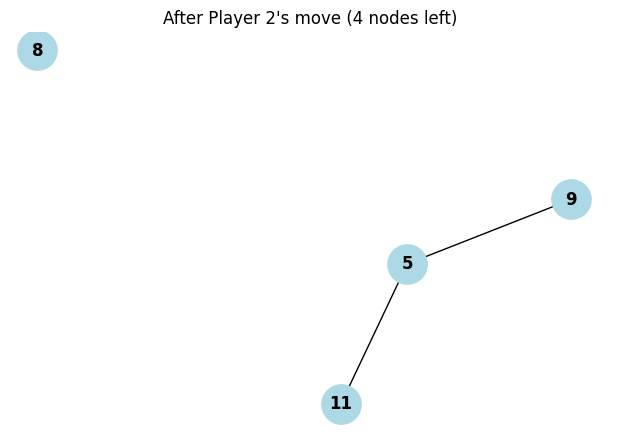


Player 1's turn.
Available nodes: [5, 8, 9, 11]
Removed node: 5
  → Also removed neighbor: 11
  → Also removed neighbor: 9


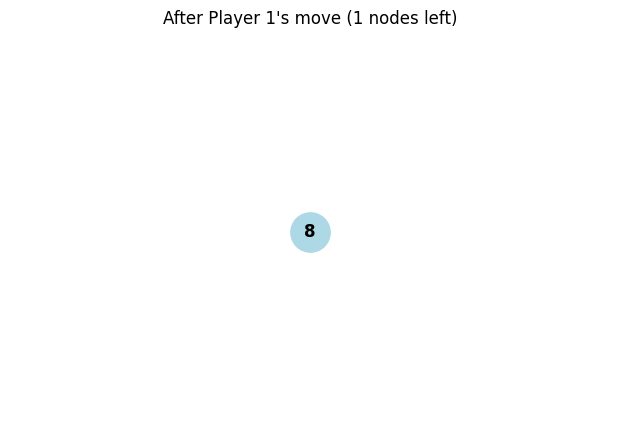


Player 2's turn.
Available nodes: [8]
Removed node: 8

🎉 Player 2 WINS!


In [47]:
# Generate a random graph
G_random = generate_random_graph(min_nodes=6, max_nodes=12, max_degree=3)

# Game Loop
players = ["Player 1", "Player 2"]
turn = 0

print(f"Random Graph with {len(G_random.nodes())} nodes and {len(G_random.edges())} edges\n")
draw_graph(G_random, f"Initial Random Graph ({len(G_random.nodes())} nodes)")

while len(G_random.nodes) > 0:
    current_player = players[turn % 2]
    print(f"\n{current_player}'s turn.")
    print("Available nodes:", sorted(G_random.nodes))
    
    node_input = input("Enter a node to remove: ").strip()
    
    # Handle integer nodes
    try:
        node = int(node_input)
    except ValueError:
        node = node_input
    
    if node not in G_random.nodes:
        print("Invalid node. Try again.")
        continue
    
    remove_node_and_neighbors(G_random, node)
    
    if len(G_random.nodes) == 0:
        print(f"\n🎉 {current_player} WINS!")
        break
    
    draw_graph(G_random, f"After {current_player}'s move ({len(G_random.nodes)} nodes left)")
    turn += 1


## 5. Sprague-Grundy Analysis (N/P Positions)

### Theory

In combinatorial game theory:
- **P-position (Previous)**: The player who just moved wins. Grundy number = 0.
- **N-position (Next)**: The player about to move wins. Grundy number > 0.

**Sprague-Grundy Theorem**: Every impartial game position has a Grundy number computed as:
- `G(position) = mex({G(next_positions)})`
- `mex` = minimum excludant (smallest non-negative integer NOT in the set)

**Key property**: For independent components, `G(total) = G(comp1) ⊕ G(comp2) ⊕ ...` (XOR)

In [48]:
import numpy as np
def mex(s):
    """Minimum excludant: smallest non-negative integer not in set s."""
    i = 0
    while i in s:
        i += 1
    return i

class SpragueGrundyAnalyzer:
    """Analyze graph game positions using Sprague-Grundy theorem."""
    
    def __init__(self, G):
        """Initialize analyzer with a graph (Node + Neighbors removal mode)."""
        self.original_graph = G.copy()
        self.nodes = tuple(sorted(G.nodes()))
        self.edges = set(G.edges())
        self.memo = {}  # Memoization for Grundy numbers
        
    def _get_neighbors(self, node, remaining_nodes):
        """Get neighbors of a node within remaining nodes."""
        neighbors = []
        for n in remaining_nodes:
            if n != node and ((node, n) in self.edges or (n, node) in self.edges):
                neighbors.append(n)
        return neighbors
    
    def _get_next_states(self, state):
        """Get all possible next states from current state."""
        next_states = []
        remaining = set(state)
        
        for node in state:
            # Remove node and all its neighbors
            neighbors = set(self._get_neighbors(node, remaining))
            new_state = remaining - {node} - neighbors
            next_states.append(frozenset(new_state))
        
        return next_states
    
    def grundy(self, state=None):
        """Compute Grundy number for a game state using dynamic programming."""
        if state is None:
            state = frozenset(self.nodes)
        
        if len(state) == 0:
            return 0
        
        if state in self.memo:
            return self.memo[state]
        
        next_grundy_values = set()
        for next_state in self._get_next_states(state):
            next_grundy_values.add(self.grundy(next_state))
        
        g = mex(next_grundy_values)
        self.memo[state] = g
        return g
    
    def is_N_position(self, state=None):
        """Check if position is N-position (winning for player to move)."""
        return self.grundy(state) > 0
    
    def is_P_position(self, state=None):
        """Check if position is P-position (losing for player to move)."""
        return self.grundy(state) == 0
    
    def get_winning_moves(self, state=None):
        """Find all winning moves from current position."""
        if state is None:
            state = frozenset(self.nodes)
        
        if self.is_P_position(state):
            return []
        
        winning_moves = []
        remaining = set(state)
        
        for node in state:
            neighbors = set(self._get_neighbors(node, remaining))
            new_state = remaining - {node} - neighbors
            
            if self.grundy(frozenset(new_state)) == 0:
                winning_moves.append(node)
        
        return winning_moves


## 6. Analyze a Graph


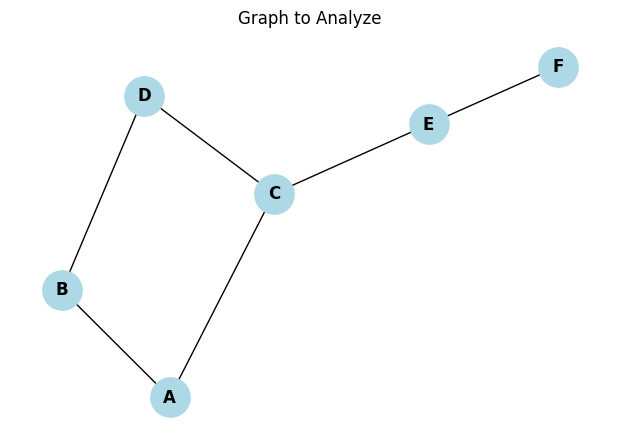

ANALYSIS RESULT
Nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Grundy Number: 1
Position: N-position (Player 1 can WIN!)
Winning Moves: ['A', 'D', 'F', 'C']


In [49]:
# Analyze a sample graph
G_analyze = nx.Graph()
G_analyze.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('B', 'D'),
    ('C', 'D'), ('C', 'E'), ('E', 'F')
])

# Show the graph first
draw_graph(G_analyze, "Graph to Analyze")

# Analyze
analyzer = SpragueGrundyAnalyzer(G_analyze)
grundy = analyzer.grundy()
winning_moves = analyzer.get_winning_moves()

print("=" * 50)
print("ANALYSIS RESULT")
print("=" * 50)
print(f"Nodes: {list(G_analyze.nodes())}")
print(f"Grundy Number: {grundy}")

if grundy > 0:
    print(f"Position: N-position (Player 1 can WIN!)")
    print(f"Winning Moves: {winning_moves}")
else:
    print(f"Position: P-position (Player 1 will LOSE)")
    print("No winning moves available")


## 7. XOR for Disconnected Components

For graphs with multiple disconnected components:
`G(total) = G(comp₁) ⊕ G(comp₂) ⊕ ... ⊕ G(compₙ)`


def analyze_with_xor(G):
    """Analyze graph using XOR of independent components."""
    components = list(nx.connected_components(G))
    
    print(f"Graph has {len(components)} connected component(s)")
    print("-" * 40)
    
    component_grundy = []
    for i, comp_nodes in enumerate(components):
        subgraph = G.subgraph(comp_nodes).copy()
        analyzer = SpragueGrundyAnalyzer(subgraph)
        g = analyzer.grundy()
        component_grundy.append(g)
        print(f"Component {i+1}: nodes={list(comp_nodes)}, Grundy={g}")
    
    total_grundy = 0
    for g in component_grundy:
        total_grundy ^= g
    
    print("-" * 40)
    print(f"Total Grundy (XOR): {' ⊕ '.join(map(str, component_grundy))} = {total_grundy}")
    
    if total_grundy > 0:
        print("Result: N-position (Player 1 can WIN)")
    else:
        print("Result: P-position (Player 1 will LOSE)")
    
    return total_grundy

# Example with disconnected graph
G_disconnected = nx.Graph()
G_disconnected.add_edges_from([
    (0, 1), (1, 2), (2, 0),  # Triangle
    (3, 4), (4, 5),          # Path
    (6, 7)                    # Edge
])

draw_graph(G_disconnected, "Disconnected Graph (3 Components)")
analyze_with_xor(G_disconnected)


## 8. N/P Position Visualization (Chessboard Grid)

For two-path component games, we can visualize N/P positions on a 2D grid like Nim.


# First, show example path graphs that form the components
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Path of 4 nodes
P4 = nx.path_graph(4)
ax = axes[0]
pos = {i: (i, 0) for i in range(4)}
nx.draw(P4, pos, ax=ax, with_labels=True, node_color='lightblue', 
        node_size=600, font_weight='bold')
ax.set_title("Path Graph P₄ (4 nodes)", fontsize=12, fontweight='bold')

# Path of 5 nodes  
P5 = nx.path_graph(5)
ax = axes[1]
pos = {i: (i, 0) for i in range(5)}
nx.draw(P5, pos, ax=ax, with_labels=True, node_color='lightgreen',
        node_size=600, font_weight='bold')
ax.set_title("Path Graph P₅ (5 nodes)", fontsize=12, fontweight='bold')

plt.suptitle("Example Path Graphs (used as components)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("""
The grid below shows N/P positions for games with TWO disconnected path components.
Each cell (m, n) represents: Path₁ with m nodes + Path₂ with n nodes
Result is computed as: G(Path₁) ⊕ G(Path₂)
""")


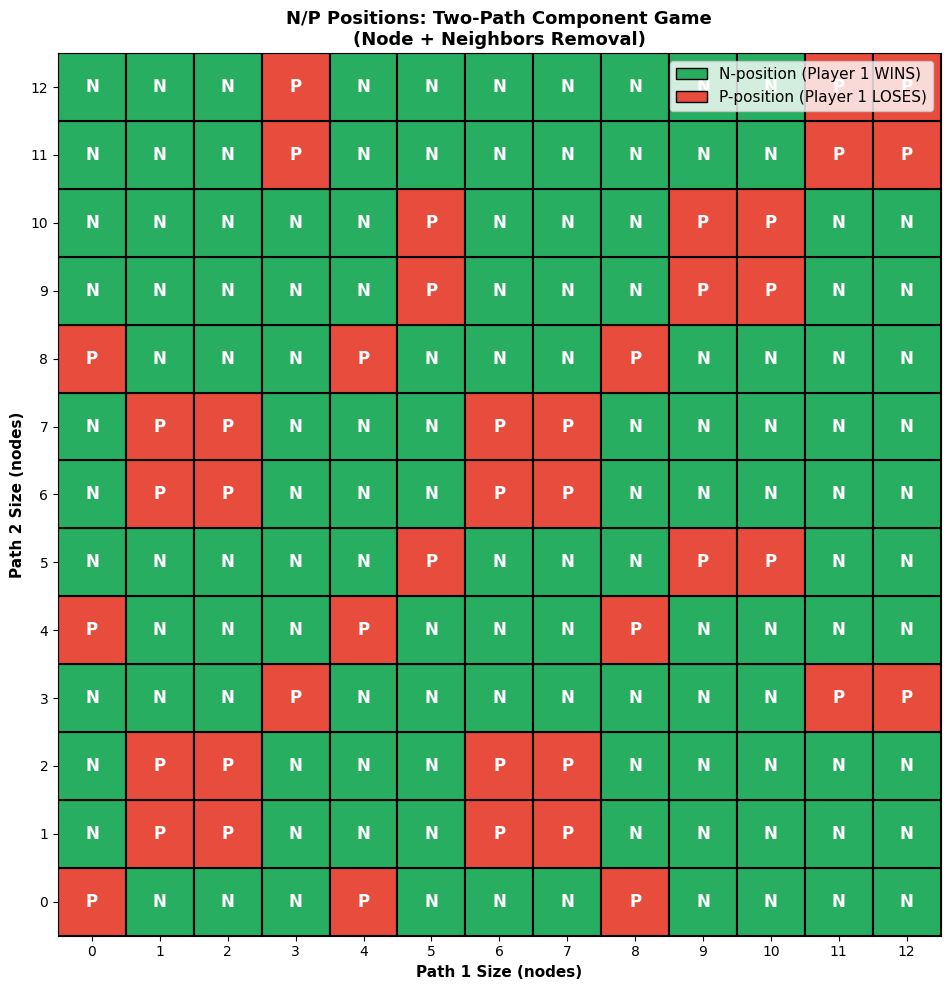


INTERPRETATION:
• Each cell (m, n) = game with two disconnected paths: P_m and P_n
• GREEN (N): Player 1 can WIN with optimal play  
• RED (P): Player 1 will LOSE with optimal opponent play
• Result = G(P_m) ⊕ G(P_n) where G = Grundy number



In [51]:
# Compute Grundy numbers for path graphs
def get_path_grundy(max_size=12):
    """Compute Grundy numbers for paths of size 0 to max_size."""
    path_grundy = {0: 0}
    for n in range(1, max_size + 1):
        P = nx.path_graph(n)
        analyzer = SpragueGrundyAnalyzer(P)
        path_grundy[n] = analyzer.grundy()
    return path_grundy

# Create N/P grid
def create_np_grid(max_size=12):
    path_grundy = get_path_grundy(max_size)
    grid = np.zeros((max_size + 1, max_size + 1))
    
    for i in range(max_size + 1):
        for j in range(max_size + 1):
            total_grundy = path_grundy[i] ^ path_grundy[j]
            grid[j, i] = 1 if total_grundy > 0 else 0
    
    return grid, path_grundy

# Draw chessboard grid
def draw_chessboard_grid(ax, grid, title):
    rows, cols = grid.shape
    colors = {0: '#E74C3C', 1: '#27AE60'}  # Red=P, Green=N
    
    for i in range(cols):
        for j in range(rows):
            color = colors[int(grid[j, i])]
            rect = plt.Rectangle((i - 0.5, j - 0.5), 1, 1, 
                                  facecolor=color, edgecolor='black', linewidth=1.5)
            ax.add_patch(rect)
            label = 'N' if grid[j, i] == 1 else 'P'
            ax.text(i, j, label, ha='center', va='center', 
                   fontsize=12, fontweight='bold', color='white')
    
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(-0.5, rows - 0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('Path 1 Size (nodes)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Path 2 Size (nodes)', fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xticks(range(cols))
    ax.set_yticks(range(rows))

# Create the visualization
fig, ax = plt.subplots(figsize=(12, 10))

grid, path_grundy = create_np_grid(12)
draw_chessboard_grid(ax, grid, 'N/P Positions: Two-Path Component Game\n(Node + Neighbors Removal)')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#27AE60', edgecolor='black', label='N-position (Player 1 WINS)'),
    Patch(facecolor='#E74C3C', edgecolor='black', label='P-position (Player 1 LOSES)')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()

print("""
INTERPRETATION:
• Each cell (m, n) = game with two disconnected paths: P_m and P_n
• GREEN (N): Player 1 can WIN with optimal play  
• RED (P): Player 1 will LOSE with optimal opponent play
• Result = G(P_m) ⊕ G(P_n) where G = Grundy number
""")


In [52]:
# Print Grundy numbers for reference
print("Grundy numbers for individual path graphs:")
print("-" * 40)
for size, grundy in sorted(path_grundy.items()):
    pos_type = "P" if grundy == 0 else "N"
    print(f"Path P_{size}: Grundy = {grundy} ({pos_type}-position)")


Grundy numbers for individual path graphs:
----------------------------------------
Path P_0: Grundy = 0 (P-position)
Path P_1: Grundy = 1 (N-position)
Path P_2: Grundy = 1 (N-position)
Path P_3: Grundy = 2 (N-position)
Path P_4: Grundy = 0 (P-position)
Path P_5: Grundy = 3 (N-position)
Path P_6: Grundy = 1 (N-position)
Path P_7: Grundy = 1 (N-position)
Path P_8: Grundy = 0 (P-position)
Path P_9: Grundy = 3 (N-position)
Path P_10: Grundy = 3 (N-position)
Path P_11: Grundy = 2 (N-position)
Path P_12: Grundy = 2 (N-position)


## 9. Enhanced Game with N/P Position Indicator

Play the game with real-time N/P position analysis shown on each graph!


In [54]:
def draw_graph_with_position(G, title="Graph", show_position=True):
    """
    Draw graph with N/P position indicator in the corner.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Draw the graph
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue', 
            node_size=800, font_weight='bold', font_size=12)
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Add N/P position indicator
    if show_position and len(G.nodes()) > 0:
        analyzer = SpragueGrundyAnalyzer(G)
        grundy = analyzer.grundy()
        
        if grundy > 0:
            pos_text = f"N-position\n(G={grundy})"
            box_color = '#27AE60'  # Green
            status = "Player to move can WIN"
        else:
            pos_text = "P-position\n(G=0)"
            box_color = '#E74C3C'  # Red
            status = "Player to move will LOSE"
        
        # Add position box in top-right corner
        props = dict(boxstyle='round,pad=0.5', facecolor=box_color, alpha=0.9)
        ax.text(0.98, 0.98, pos_text, transform=ax.transAxes, fontsize=14,
                verticalalignment='top', horizontalalignment='right',
                bbox=props, color='white', fontweight='bold')
        
        # Add status text below the graph
        ax.text(0.5, -0.1, status, transform=ax.transAxes, fontsize=12,
                ha='center', fontweight='bold', 
                color='green' if grundy > 0 else 'red')
    
    plt.tight_layout()
    plt.show()
    
    return grundy if show_position and len(G.nodes()) > 0 else None


GAME START - Initial Position Analysis
Nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
Edges: [('A', 'B'), ('A', 'C'), ('A', 'G'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('E', 'F'), ('G', 'H'), ('G', 'I'), ('H', 'I')]

Initial Grundy Number: 0
Initial Position: P-position → Player 1 will LOSE with optimal play


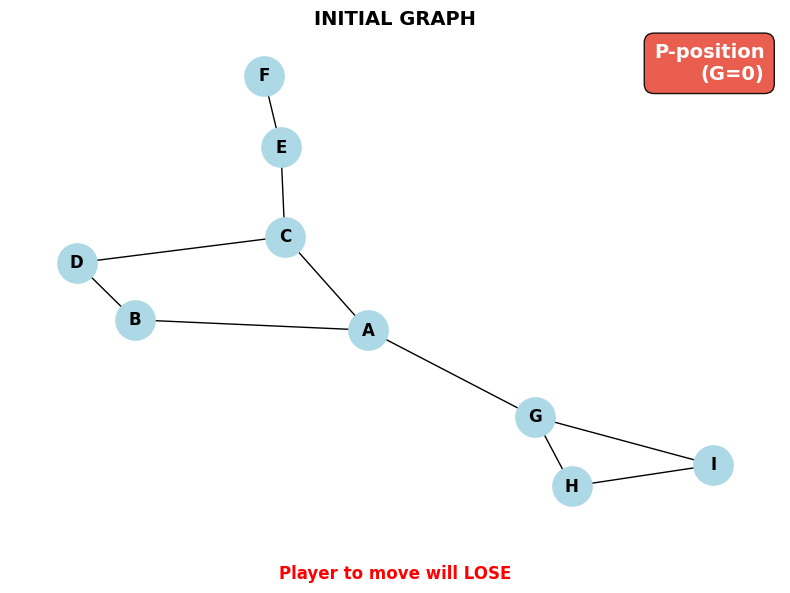


Player 1's turn
Available nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
Current position: P-position (Grundy=0)
No winning moves - any move leads to N-position for opponent
Removed node: E
  → Also removed neighbor: C
  → Also removed neighbor: F


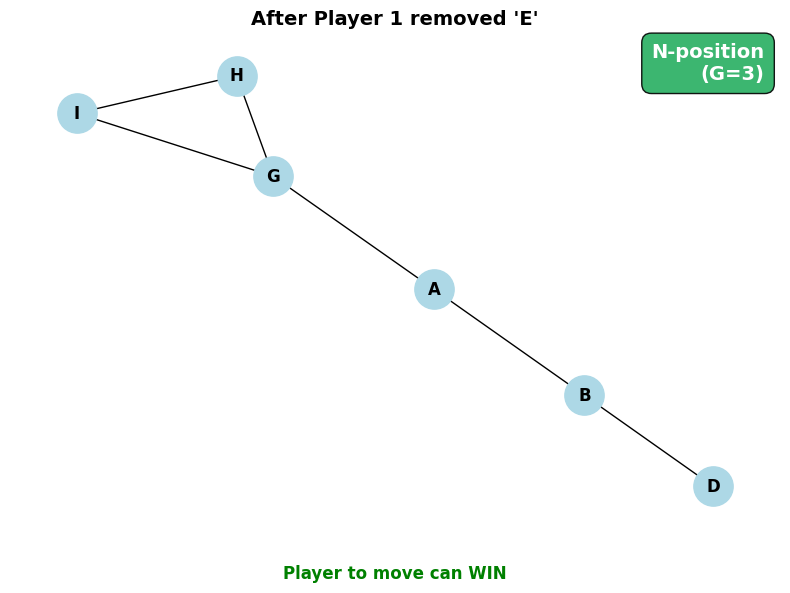


Player 2's turn
Available nodes: ['A', 'B', 'D', 'G', 'H', 'I']
Current position: N-position (Grundy=3)
Winning moves: ['A']
Removed node: D
  → Also removed neighbor: B


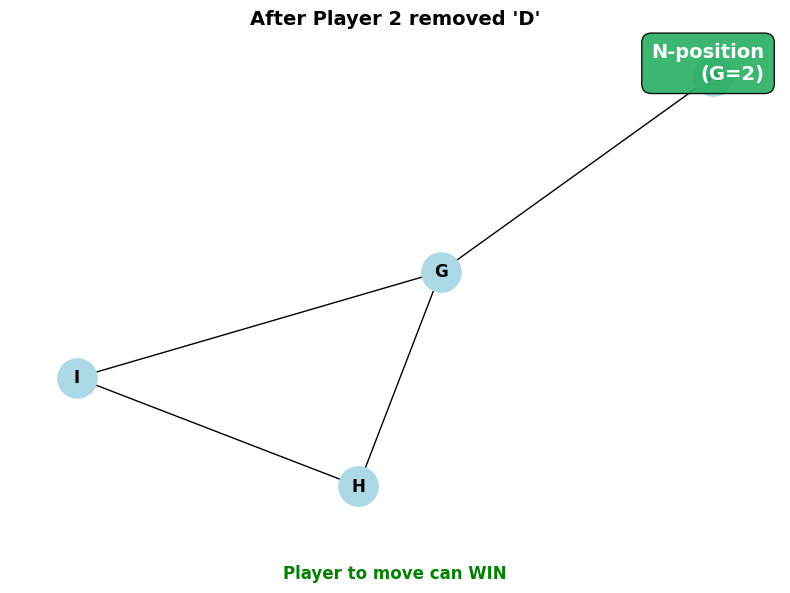


Player 1's turn
Available nodes: ['A', 'G', 'H', 'I']
Current position: N-position (Grundy=2)
Winning moves: ['G']
Removed node: G
  → Also removed neighbor: H
  → Also removed neighbor: I
  → Also removed neighbor: A

🎉 Player 1 removed the last node(s) and WINS!

Game Over!


In [55]:
# ============================================================
# ENHANCED GAME WITH N/P POSITION INDICATOR
# ============================================================

# Create the game graph
G_enhanced = nx.Graph()
G_enhanced.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('B', 'D'),
    ('C', 'D'), ('C', 'E'), ('E', 'F'),
    ('G', 'H'), ('H', 'I'), ('I', 'G'),
    ('A', 'G')
])

# Store initial graph for reference
G_initial = G_enhanced.copy()

# Show initial graph with position analysis
print("=" * 60)
print("GAME START - Initial Position Analysis")
print("=" * 60)

# Analyze initial position
initial_analyzer = SpragueGrundyAnalyzer(G_initial)
initial_grundy = initial_analyzer.grundy()
winning_moves = initial_analyzer.get_winning_moves()

print(f"Nodes: {list(G_initial.nodes())}")
print(f"Edges: {list(G_initial.edges())}")
print(f"\nInitial Grundy Number: {initial_grundy}")
if initial_grundy > 0:
    print(f"Initial Position: N-position → Player 1 can WIN!")
    print(f"Winning moves for Player 1: {winning_moves}")
else:
    print(f"Initial Position: P-position → Player 1 will LOSE with optimal play")

# Draw initial graph with position indicator
draw_graph_with_position(G_enhanced, "INITIAL GRAPH")

# Game Loop
players = ["Player 1", "Player 2"]
turn = 0

while len(G_enhanced.nodes) > 0:
    current_player = players[turn % 2]
    print(f"\n{'='*60}")
    print(f"{current_player}'s turn")
    print(f"{'='*60}")
    print(f"Available nodes: {list(G_enhanced.nodes)}")
    
    # Show current position type
    if len(G_enhanced.nodes) > 0:
        temp_analyzer = SpragueGrundyAnalyzer(G_enhanced)
        current_grundy = temp_analyzer.grundy()
        current_winning = temp_analyzer.get_winning_moves()
        
        if current_grundy > 0:
            print(f"Current position: N-position (Grundy={current_grundy})")
            print(f"Winning moves: {current_winning}")
        else:
            print(f"Current position: P-position (Grundy=0)")
            print("No winning moves - any move leads to N-position for opponent")
    
    node = input("\nEnter a node to remove: ").strip()
    if node not in G_enhanced.nodes:
        print("Invalid node. Try again.")
        continue
    
    remove_node_and_neighbors(G_enhanced, node)
    
    if len(G_enhanced.nodes) == 0:
        print(f"\n{'='*60}")
        print(f"🎉 {current_player} removed the last node(s) and WINS!")
        print(f"{'='*60}")
        break
    
    # Draw updated graph with position indicator
    draw_graph_with_position(G_enhanced, f"After {current_player} removed '{node}'")
    turn += 1

print("\nGame Over!")


In [ ]:
# End of notebook - Run the cell above to play the enhanced game!
